In [1]:
import numpy as np
import cv2
import glob

# get all images
myDataSet=[
    "n02105641-Old_English_sheepdog",
    "n02109961-Eskimo_dog",
    "n02093256-Staffordshire_bullterrier",
    "n02113624-toy_poodle"
]
breeds = []
labels = []

for breed in myDataSet:
    path_ = f"Images/{breed}/*"
    for img in glob.glob(path_):
        breeds.append(img)

for index in range(len(myDataSet)):
    path_ = f"Images/{myDataSet[index]}/*"
    for _ in glob.glob(path_):
        labels.append(index)

breeds

['Images/n02105641-Old_English_sheepdog\\n02105641_10048.jpg',
 'Images/n02105641-Old_English_sheepdog\\n02105641_10051.jpg',
 'Images/n02105641-Old_English_sheepdog\\n02105641_10100.jpg',
 'Images/n02105641-Old_English_sheepdog\\n02105641_10151.jpg',
 'Images/n02105641-Old_English_sheepdog\\n02105641_10188.jpg',
 'Images/n02105641-Old_English_sheepdog\\n02105641_1019.jpg',
 'Images/n02105641-Old_English_sheepdog\\n02105641_10264.jpg',
 'Images/n02105641-Old_English_sheepdog\\n02105641_10280.jpg',
 'Images/n02105641-Old_English_sheepdog\\n02105641_10380.jpg',
 'Images/n02105641-Old_English_sheepdog\\n02105641_10397.jpg',
 'Images/n02105641-Old_English_sheepdog\\n02105641_1045.jpg',
 'Images/n02105641-Old_English_sheepdog\\n02105641_10672.jpg',
 'Images/n02105641-Old_English_sheepdog\\n02105641_10800.jpg',
 'Images/n02105641-Old_English_sheepdog\\n02105641_1109.jpg',
 'Images/n02105641-Old_English_sheepdog\\n02105641_11253.jpg',
 'Images/n02105641-Old_English_sheepdog\\n02105641_11313.j

In [2]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [3]:
# convert all the image to edge histogram

edge_histogram_data = []

for breed in breeds:
    img = cv2.imread(breed, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img, 100, 200)
    histValue, _ = np.histogram(edges.flatten(), bins=256, range=[0,256])
    edge_histogram_data.append(histValue)

edge_hist = np.array(edge_histogram_data)
edge_hist

array([[158401,      0,      0, ...,      0,      0,  26099],
       [157556,      0,      0, ...,      0,      0,  29944],
       [167922,      0,      0, ...,      0,      0,  19578],
       ...,
       [171684,      0,      0, ...,      0,      0,  15816],
       [ 53602,      0,      0, ...,      0,      0,   1198],
       [182668,      0,      0, ...,      0,      0,   4832]], dtype=int64)

In [4]:
#3. Split the dataset into a training set and a test set: For each class, perform a training/test split of 80/20. (0.25 point)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(edge_hist, labels, test_size=0.2, stratify=labels)

In [5]:
#4. Perform standardization on the training dataset. (see https://scikit-learn.org/stable/modules/preprocessing.html (0.25 point)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
standardized_dataset_X = scaler.fit_transform(X_train)
standardized_dataset_X

#5. Perform standardization on the test dataset using the means and variances you obtained from the training dataset.
X_test_standardized = scaler.fit_transform(X_test)
X_test_standardized

array([[ 0.27709317,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.16762385],
       [ 0.54193555,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.92296324],
       [-0.05648552,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.02359338],
       ...,
       [-0.84826916,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.5651725 ],
       [ 0.11339028,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.26922471],
       [ 0.2674167 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.20747032]])

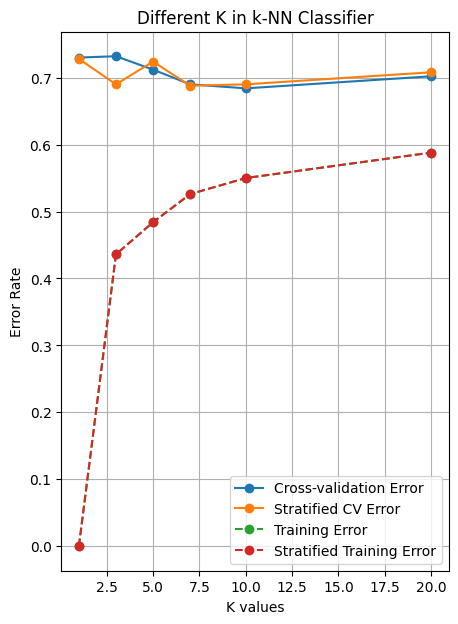

Best K based on lowest stratified CV error: 7
Error rate on the test set: 64.80%


In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

def get_errors(kDataSet, standardized_train_features, train_labels, raw_train_features):
    cross_val_errors = []
    stratified_errors = []
    train_errors = []
    strat_train_errors = []

    stratified_fold = StratifiedKFold(n_splits=5)

    for k in kDataSet:
        model = KNeighborsClassifier(n_neighbors=k)

        scores_cv = cross_val_score(model, standardized_train_features, train_labels, cv=5)
        cross_val_errors.append(np.mean(1 - scores_cv))

        scores_stratified = cross_val_score(model, raw_train_features, train_labels, cv=stratified_fold)
        stratified_errors.append(np.mean(1 - scores_stratified))

        model.fit(raw_train_features, train_labels)
        train_errors.append(1 - model.score(raw_train_features, train_labels))
        strat_train_errors.append(train_errors[-1])

    return cross_val_errors, stratified_errors, train_errors, strat_train_errors

def showErrorGraph(kDataSet, cross_val_errors, stratified_errors, train_errors, strat_train_errors):
    plt.figure(figsize=(5, 7))

    plt.plot(kDataSet, cross_val_errors, label="Cross-validation Error", marker='o')
    plt.plot(kDataSet, stratified_errors, label="Stratified CV Error", marker='o')
    plt.plot(kDataSet, train_errors, label="Training Error", linestyle='--', marker='o')
    plt.plot(kDataSet, strat_train_errors, label="Stratified Training Error", linestyle='--', marker='o')

    plt.xlabel('K values')
    plt.ylabel('Error Rate')
    plt.title('Different K in k-NN Classifier')
    plt.legend()
    plt.grid(True)
    plt.show()

def get_best_k_value(kDataSet, stratified_errors, standardized_train_features, train_labels, standardized_test_features, test_labels):
    best_k_index = np.argmin(stratified_errors)
    best_k_value = kDataSet[best_k_index]
    print(f"Best K based on lowest stratified CV error: {best_k_value}")

    optimized_model = KNeighborsClassifier(n_neighbors=best_k_value)
    optimized_model.fit(standardized_train_features, train_labels)

    test_set_error = 1 - optimized_model.score(standardized_test_features, test_labels)
    print(f"Error rate on the test set: {test_set_error * 100:.2f}%")

kDataSet = [1, 3, 5, 7, 10, 20]

cross_val_errors, stratified_errors, train_errors, strat_train_errors = get_errors(kDataSet, standardized_dataset_X, y_train, X_train)

showErrorGraph(kDataSet, cross_val_errors, stratified_errors, train_errors, strat_train_errors)

get_best_k_value(kDataSet, stratified_errors, standardized_dataset_X, y_train, X_test_standardized, y_test)


In [13]:
# Which 𝑘 has the lowest mean error for each curve?

# lowest mean standard CV error: k = 10
# lowest mean stratified CV error:  k = 7
# lowest mean training error: k = 1
# lowest mean stratified training error: k = 1

# Model Complexity in Relation to k
# By increase in the value of k there will be for simpler the complexity of the model

# Overfitting/Underfitting
# overfitting occurs at the lowest value of k and underfitting occurs at the highest value of k

Cross-validation score mean = 0.31


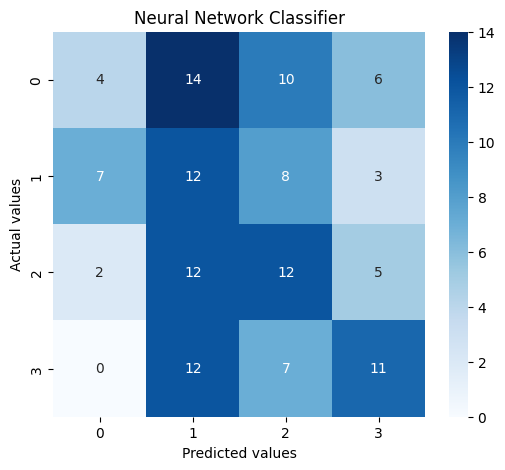

Accuracy score: 0.31
F1 Score: 0.30


In [21]:
# 7. Performance Comparison) Perform stratified 5-fold cross-validation on the 4-class
# classification problem using the three classification methods 
# (available on canvas) assigned to you. Plot the (3) confusion matrices for
# using three approaches (clearly label the classes) on the test set (See Figure 1). 
# (If you use code from any website, please do proper referencing. You will get 0 point 
#  for this assignment without proper referencing) (3.75 points)


import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier
import seaborn as sns

def cross_validate_and_predict(classifier, X_train, y_train, X_test):
    cv_fold = StratifiedKFold(n_splits=5)
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=cv_fold)
    print(f"Cross-validation score mean = {np.mean(cv_scores):.2f}")
    
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return y_pred

def plot_confusion_matrix_and_scores(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted values")
    plt.ylabel("Actual values")
    plt.show()

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="weighted")
    print(f"Accuracy score: {acc:.2f}")
    print(f"F1 Score: {f1:.2f}")

def evaluate_classifier(classifier, X_train, X_test, y_train, y_test, title):
    y_pred = cross_validate_and_predict(classifier, X_train, y_train, X_test)
    plot_confusion_matrix_and_scores(y_test, y_pred, title)

# Neural network
neural_network_classifier = MLPClassifier(random_state=1, max_iter=1000, learning_rate_init=0.01)
evaluate_classifier(neural_network_classifier, standardized_dataset_X, X_test_standardized, y_train, y_test, "Neural Network Classifier")

Cross-validation score mean = 0.27


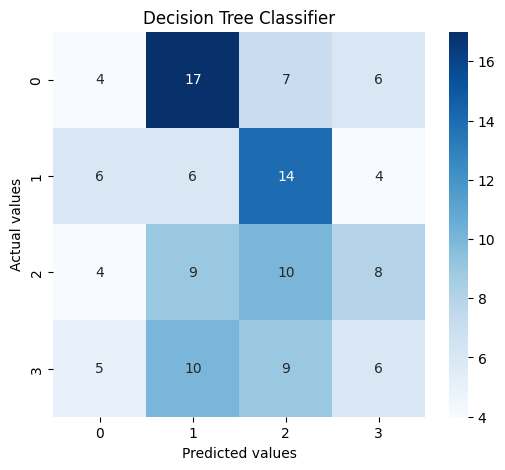

Accuracy score: 0.21
F1 Score: 0.20


In [22]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(max_depth = 10, random_state=42)
evaluate_classifier(decision_tree_classifier, standardized_dataset_X, X_test_standardized, y_train, y_test, "Decision Tree Classifier")

Cross-validation score mean = 0.33


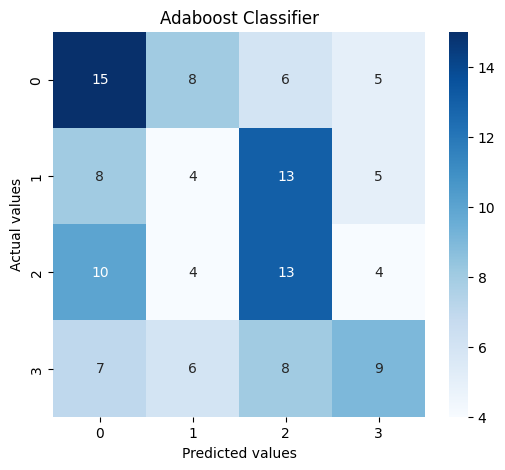

Accuracy score: 0.33
F1 Score: 0.32


In [24]:
# Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier(n_estimators=100, algorithm="SAMME")
evaluate_classifier(adaboost_classifier, standardized_dataset_X, X_test_standardized, y_train, y_test, "Adaboost Classifier")

#### By visually comparing (e.g., looking at the color on the diagonal values, etc.) the three matrices (on the test set), which do you think is the best method? Why? (0.50 point)

Adaboost is the best method as its diagonal values for higher thatn other.

#### Compute the accuracies for the three methods on the test set. Which is the best method? (0.25 point)
Adaboost classifier accuracies = 0.33, which is higher than others so it is the best method

#### Based on the mean validation accuracies (from the 5-fold cross-validation) for the three methods. Which is the best method? (0.25 point)
Adaboost classifier is the best method as it mean validation accuracies is higher than others ie., acc = 0.33

#### Compute the F-measure for the three methods on the test set. Which is the best method? (0.25 point)
Adaboost classifier has the best F-measure value ie., 0.32 which makes it best method


## All refenreces related to above algorithms
+ https://seaborn.pydata.org/generated/seaborn.heatmap.html
+ https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
+ https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
+ https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
+ https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html